In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#pip install matplotlib
#!pip install scikit-learn

In [4]:
df = pd.read_csv('olympic_results.csv')
df

,Unnamed: 0.1,Unnamed: 0,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,0,0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,1,1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,2,2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,3,3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,4,4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162799,162799,162799,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,NaN,DNS,Poland,PL,POL,https://olympics.com/en/athletes/franciszek-bujak,Franciszek BUJAK,NaN,IRM
162800,162800,162800,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,NaN,DNS,Poland,PL,POL,NaN,Henryk MÃ¼ckenbrunn,NaN,IRM
162801,162801,162801,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,NaN,DNS,Czechoslovakia,CSHH,TCH,NaN,Milda Prokopec,NaN,IRM
162802,162802,162802,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,NaN,DNS,United States of America,US,USA,NaN,Sigurd Overby,NaN,IRM


In [5]:
df.isnull().sum()

Unnamed: 0.1                  0
Unnamed: 0                    0
discipline_title              0
event_title                   0
slug_game                     0
participant_type              0
medal_type               142598
athletes                 154828
rank_equal               130278
rank_position              3878
country_name                  0
country_code               5036
country_3_letter_code         0
athlete_url               32813
athlete_full_name         21158
value_unit                84158
value_type                72755
dtype: int64

In [6]:
#nettoyage du dataframe
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'country_code', 'country_3_letter_code', 'athlete_url', 'rank_equal'])
df

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_position,country_name,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",1,Italy,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",2,Norway,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",3,Sweden,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",4,Great Britain,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",5,Canada,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
162799,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,DNS,Poland,Franciszek BUJAK,NaN,IRM
162800,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,DNS,Poland,Henryk MÃ¼ckenbrunn,NaN,IRM
162801,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,DNS,Czechoslovakia,Milda Prokopec,NaN,IRM
162802,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,DNS,United States of America,Sigurd Overby,NaN,IRM


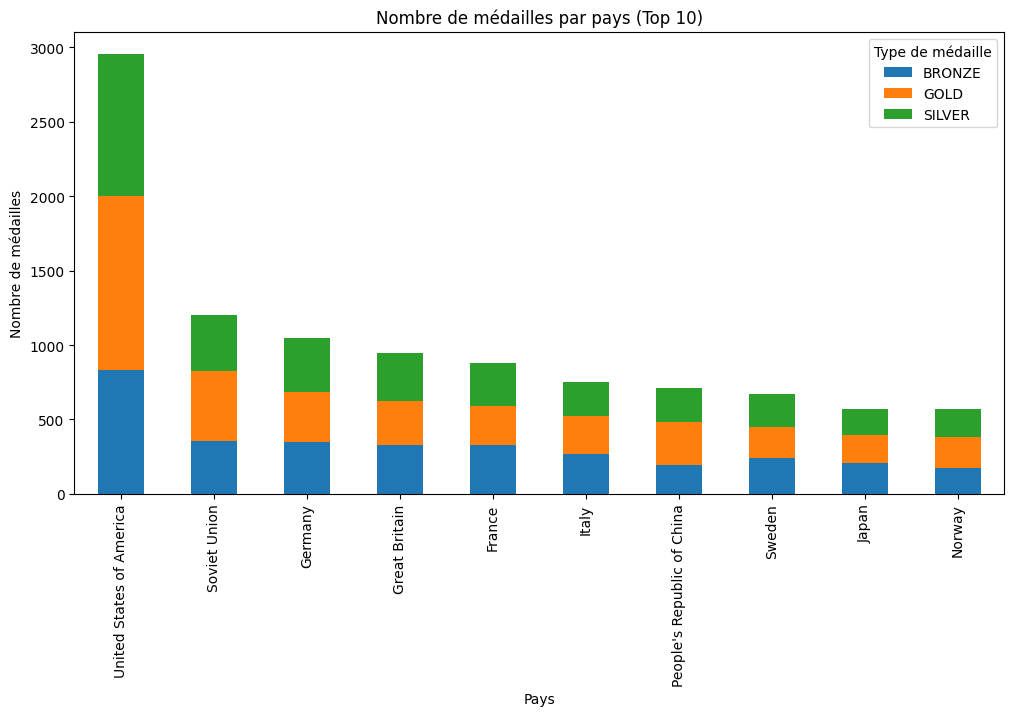

In [7]:
#les 10 pays avec le plus de médailles remportées
medals_count = df.groupby(['country_name', 'medal_type']).size().unstack(fill_value=0)

medals_count['Total'] = medals_count.sum(axis=1)

top_10_countries = medals_count.sort_values(by='Total', ascending=False).head(10)

top_10_countries.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Nombre de médailles par pays (Top 10)')
plt.xlabel('Pays')
plt.ylabel('Nombre de médailles')
plt.legend(title='Type de médaille')

plt.show()


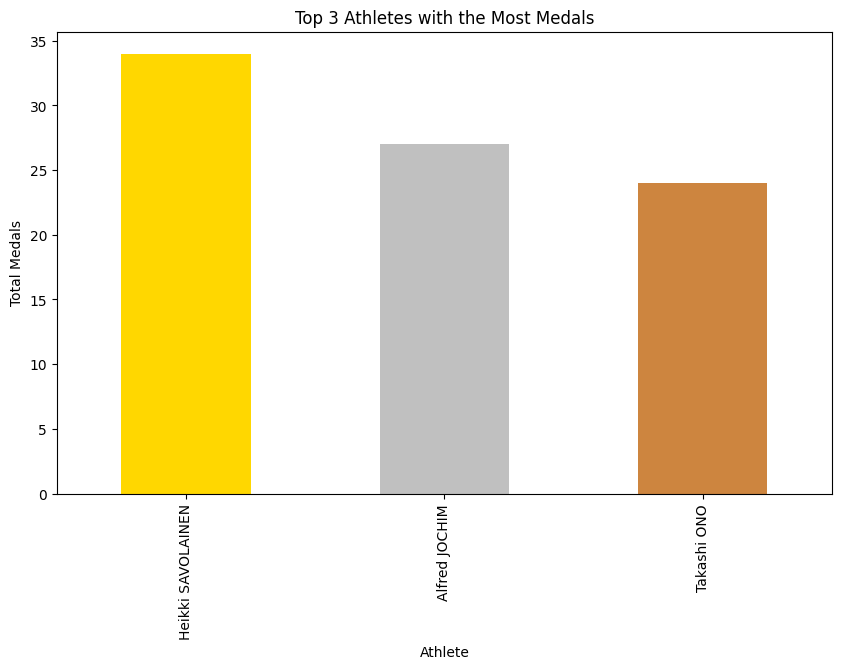

In [8]:
#Les 3 athletes les plus médaillés
athlete_medals_count = df.groupby('athlete_full_name').size().sort_values(ascending=False)

top_3_athletes = athlete_medals_count.head(3)

colors = ['gold', 'silver', 'peru']

plt.figure(figsize=(10, 6))
top_3_athletes.plot(kind='bar', color=colors)

plt.title('Top 3 Athletes with the Most Medals')
plt.xlabel('Athlete')
plt.ylabel('Total Medals')

plt.show()

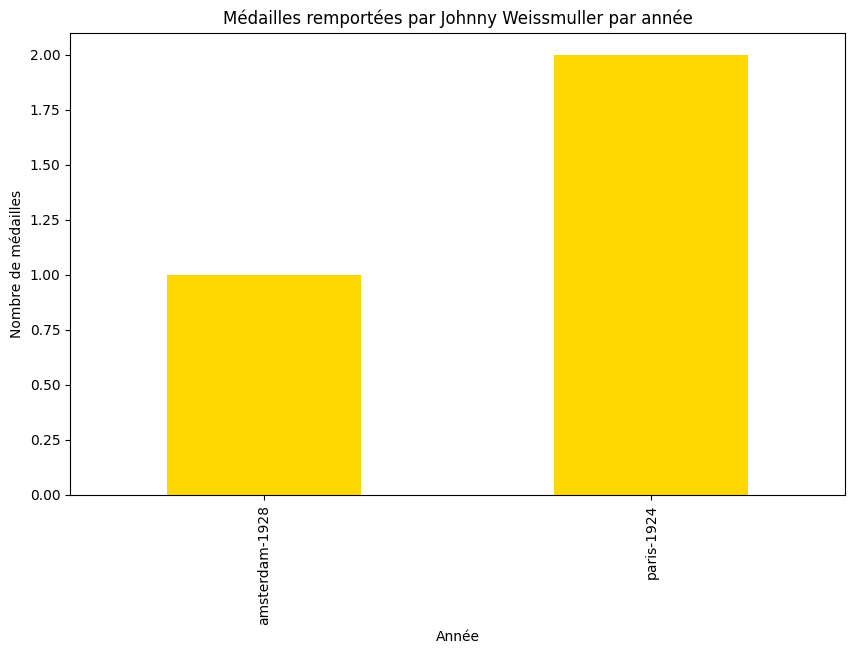

In [9]:
johnny_entries = df[df['athlete_full_name'].notna() & df['athlete_full_name'].str.contains('Johnny WEISSMULLER')]

medals_by_year = johnny_entries.groupby('slug_game').size()

#diagramme à barres
plt.figure(figsize=(10, 6))
medals_by_year.plot(kind='bar', color='gold')

#titres et des étiquettes
plt.title('Médailles remportées par Johnny Weissmuller par année')
plt.xlabel('Année')
plt.ylabel('Nombre de médailles')

#Afficher le diagramme
plt.show()


In [10]:
#Christa Luding-Rothenburger a t-elle déjà remporté des médailles?
christa_entries = df[df['athlete_full_name'].str.contains("Christa LUDING-ROTHENBURGER", case=False, na=False)]

# Vérifier s'il y a des médailles remportées par Christa
has_medals = not christa_entries.empty

if has_medals:
    print("Christa Ludinger-Rothenburger a remporté des médailles. Voici les détails :")
    print(christa_entries)
else:
    print("Christa Ludinger-Rothenburger n'a remporté aucune médaille.")

Christa Ludinger-Rothenburger a remporté des médailles. Voici les détails :
       discipline_title   event_title         slug_game participant_type  \
84162     Speed skating   1000m women  albertville-1992          Athlete   
84193     Speed skating    500m women  albertville-1992          Athlete   
88071     Cycling Track  sprint women        seoul-1988          Athlete   
93019     Speed skating    500m women      calgary-1988          Athlete   
93073     Speed skating   1000m women      calgary-1988          Athlete   
100226    Speed skating    500m women     sarajevo-1984          Athlete   
100305    Speed skating   1000m women     sarajevo-1984          Athlete   
104468    Speed skating   1000m women  lake-placid-1980          Athlete   
104630    Speed skating    500m women  lake-placid-1980          Athlete   

       medal_type athletes rank_position  \
84162         NaN      NaN             8   
84193      BRONZE      NaN             3   
88071      SILVER      NaN     

# Prédictions des rangs de la France en Judo

In [11]:
df

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_position,country_name,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",1,Italy,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",2,Norway,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",3,Sweden,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",4,Great Britain,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",5,Canada,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
162799,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,DNS,Poland,Franciszek BUJAK,NaN,IRM
162800,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,DNS,Poland,Henryk MÃ¼ckenbrunn,NaN,IRM
162801,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,DNS,Czechoslovakia,Milda Prokopec,NaN,IRM
162802,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,DNS,United States of America,Sigurd Overby,NaN,IRM


In [12]:
df['medal_type'] = df['medal_type'].fillna('no medal')

unique_rank_positions = df['rank_position'].unique()

print(unique_rank_positions)
df

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '17' '16' '19' '29' '26' '24'
 '21' '28' '18' '27' '23' '25' '30' '14' '11' '20' '13' '12' '15' '22'
 '31' '32' 'DNS' 'DNF' 'PEN' '33' 'YCD' '51' '42' '50' '47' '41' '44' '36'
 '45' '55' '48' '38' '56' '54' '39' '49' '43' '52' '34' '40' '35' '53'
 '46' '37' 'DSQ' 'WDR' 'LAP' '58' '57' '87' '80' '89' '74' '64' '59' '85'
 '66' '63' '94' '65' '90' '60' '68' '77' '93' '92' '88' '72' '70' '86'
 '78' '79' '84' '83' '69' '67' '62' '73' '75' '61' '81' '76' '71' '82'
 '91' nan '98' '96' '95' '97' 'DQB' '99' '100' '101' '102' '103' '104'
 '105' '106' '107' '108' '109' '110' '111' '112' '113' '114' '115' '116'
 '117' '118' '119' '120' '121' '122' '123' '124' '125' '126' '127' '128'
 '129' '130' '131' '132' '133' '134' '135' '136' '137' '138' '139' '140'
 '142' '143' '144' '147' '150' '152' '155' '156' '157' '158' '160' '161'
 '162' '164' '165' '166' '167' '168' '169' '170' '171' '172' '173' '174'
 '175' '176' '177' '178' '179' '180' '181' '182' '184' '185

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_position,country_name,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",1,Italy,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",2,Norway,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",3,Sweden,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,no medal,"[('Jennifer DODDS', 'https://olympics.com/en/a...",4,Great Britain,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,no medal,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",5,Canada,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
162799,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,no medal,NaN,DNS,Poland,Franciszek BUJAK,NaN,IRM
162800,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,no medal,NaN,DNS,Poland,Henryk MÃ¼ckenbrunn,NaN,IRM
162801,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,no medal,NaN,DNS,Czechoslovakia,Milda Prokopec,NaN,IRM
162802,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,no medal,NaN,DNS,United States of America,Sigurd Overby,NaN,IRM


In [13]:
#fonction pour vérifier si une valeur est un entier
def is_integer(value):
    try:
        int_value = int(value)
        return True
    except (ValueError, TypeError):
        return False

# Appliquer la fonction pour filtrer les lignes où 'rank_position' est un entier
df_filtered = df[df['rank_position'].apply(is_integer)]

# Afficher les valeurs uniques de 'rank_position' après le filtrage
unique_rank_positions = df_filtered['rank_position'].unique()
print(unique_rank_positions)

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '17' '16' '19' '29' '26' '24'
 '21' '28' '18' '27' '23' '25' '30' '14' '11' '20' '13' '12' '15' '22'
 '31' '32' '33' '51' '42' '50' '47' '41' '44' '36' '45' '55' '48' '38'
 '56' '54' '39' '49' '43' '52' '34' '40' '35' '53' '46' '37' '58' '57'
 '87' '80' '89' '74' '64' '59' '85' '66' '63' '94' '65' '90' '60' '68'
 '77' '93' '92' '88' '72' '70' '86' '78' '79' '84' '83' '69' '67' '62'
 '73' '75' '61' '81' '76' '71' '82' '91' '98' '96' '95' '97' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124'
 '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135' '136'
 '137' '138' '139' '140' '142' '143' '144' '147' '150' '152' '155' '156'
 '157' '158' '160' '161' '162' '164' '165' '166' '167' '168' '169' '170'
 '171' '172' '173' '174' '175' '176' '177' '178' '179' '180' '181' '182'
 '184' '185' '141' '146' '148' '151' '153' '154' '159' '183' '1

In [14]:
df_filtered

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_position,country_name,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",1,Italy,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",2,Norway,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",3,Sweden,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,no medal,"[('Jennifer DODDS', 'https://olympics.com/en/a...",4,Great Britain,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,no medal,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",5,Canada,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
162785,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,no medal,NaN,23,Switzerland,Hans EIDENBENZ,10.313,POINTS
162786,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,no medal,NaN,24,Switzerland,Xavier Affentranger,7.813,POINTS
162787,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,no medal,NaN,25,France,Martial PAYOT,7.355,POINTS
162788,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,no medal,NaN,26,Czechoslovakia,Josef BIM,2.333,POINTS


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Filtrer les données pour la France et le Judo
data_filtered = df[(df['country_name'] == 'France') & (df['discipline_title'] == 'Judo')]

# Sélectionner les colonnes pertinentes
features = data_filtered[['event_title', 'slug_game', 'participant_type', 'medal_type']]
target = data_filtered['rank_position'].astype(int)

# Encodage des variables catégorielles (médailles)
encoder = OneHotEncoder()
features_encoded = encoder.fit_transform(features)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

#Entrainement du modele
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

# Optionnel : Afficher les premières prédictions comparées aux valeurs réelles
results = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
print(results.head(10))

Erreur quadratique moyenne: 11.108999999999998
        Real  Predicted
96541      5       5.62
19979      7      11.64
67153      3       3.00
79492      1       1.00
53779      5       5.96
7918       1       1.00
105777    12       7.38
57215      1       1.00
57237      7       6.16
19956      7      10.04


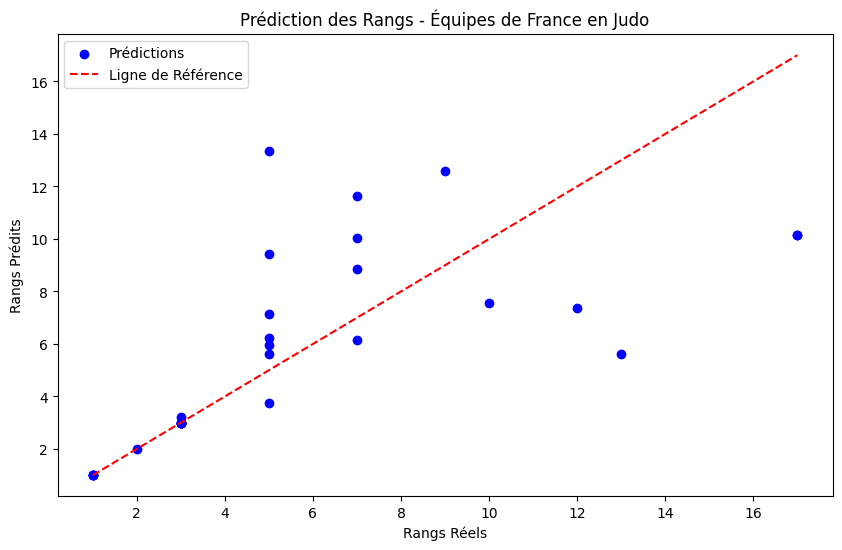

In [16]:
import matplotlib.pyplot as plt

# Tracer les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ligne de Référence')
plt.xlabel('Rangs Réels')
plt.ylabel('Rangs Prédits')
plt.title('Prédiction des Rangs - Équipes de France en Judo')
plt.legend()
plt.show()


In [17]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Filtage des données pour la France et la discipline Judo
data_filtered = df[(df['country_name'] == 'France') & (df['discipline_title'] == 'Judo')]

# Séléction des colonnes
features = data_filtered[['event_title', 'slug_game', 'participant_type', 'country_name']]
target = data_filtered['rank_position'].astype(int)

# Encodage des variables catégorielles avec gestion des catégories inconnues
encoder = OneHotEncoder(handle_unknown='ignore')
features_encoded = encoder.fit_transform(features)

# Entrainement du modele sur toutes les données
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features_encoded, target)

# Préparer les données pour la prédiction future
future_data = pd.DataFrame({
    'event_title': ['Judo'],
    'slug_game': ['JO_2024'],
    'participant_type': ['Athlete'],
    'country_name' : ['France']
})

# Encodage des données futures
future_encoded = encoder.transform(future_data)

# Prédire les rangs pour les futurs événements
future_predictions = model.predict(future_encoded)
future_predictions_rounded = np.round(future_predictions)


# Afficher les prédictions arrondies
predictions_df = future_data.copy()
predictions_df['Predicted_Rank'] = future_predictions_rounded
print(predictions_df)

  event_title slug_game participant_type country_name  Predicted_Rank
0        Judo   JO_2024          Athlete       France             3.0


Erreur quadratique moyenne (MSE) : 30.254415624999996
Coefficient de détermination (R²) : -0.0557702290076334
  event_title slug_game participant_type country_name  Predicted_Rank
0        Judo   JO_2024          Athlete       France             3.0
1        Judo   JO_2024          Athlete        Japan             1.0
2        Judo   JO_2024          Athlete       Sweden            10.0


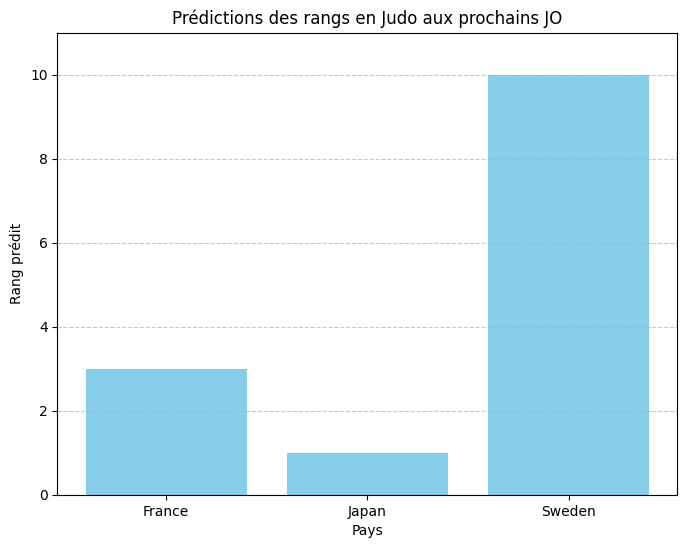

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Filtage des données pour les pays et la discipline Judo
countries = ['France', 'Japan', 'Sweden']
data_filtered = df[(df['country_name'].isin(countries)) & (df['discipline_title'] == 'Judo')]

# Sélection des colonnes
features = data_filtered[['event_title', 'slug_game', 'participant_type', 'country_name']]
target = data_filtered['rank_position'].astype(int)

# Encodage des variables catégorielles avec gestion des catégories inconnues
encoder = OneHotEncoder(handle_unknown='ignore')
features_encoded = encoder.fit_transform(features)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Entraînement du modèle sur les données d'entraînement
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erreur quadratique moyenne (MSE) : {mse}')
print(f'Coefficient de détermination (R²) : {r2}')

# Préparer les données pour la prédiction future
future_data = pd.DataFrame({
    'event_title': ['Judo'] * len(countries),
    'slug_game': ['JO_2024'] * len(countries),
    'participant_type': ['Athlete'] * len(countries),
    'country_name': countries
})

# Encodage des données futures
future_encoded = encoder.transform(future_data)

# Prédire les rangs pour les futurs événements
future_predictions = model.predict(future_encoded)
future_predictions_rounded = np.round(future_predictions)

# Afficher les prédictions arrondies
predictions_df = future_data.copy()
predictions_df['Predicted_Rank'] = future_predictions_rounded
print(predictions_df)

# Création du graphique
plt.figure(figsize=(8, 6))
plt.bar(predictions_df['country_name'], predictions_df['Predicted_Rank'], color='skyblue')
plt.xlabel('Pays')
plt.ylabel('Rang prédit')
plt.title('Prédictions des rangs en Judo aux prochains JO')
plt.ylim(0, max(predictions_df['Predicted_Rank']) + 1)  # Ajuster la limite y pour une meilleure visualisation
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()
